##Заливка данных




In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

Это ссылка на файл: https://drive.google.com/file/d/16fhEy-dMEXtCLsCiZ1GWyDV9cxTokqwF/view?usp=sharing



In [ ]:
!gdown --id 16fhEy-dMEXtCLsCiZ1GWyDV9cxTokqwF

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16fhEy-dMEXtCLsCiZ1GWyDV9cxTokqwF
To: /content/StudentsPerformance.csv
100% 72.0k/72.0k [00:00<00:00, 68.7MB/s]


In [ ]:
df = pd.read_csv('/content/StudentsPerformance.csv')

#Предобработка данных

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.columns = df.columns.str.replace(' ','_').str.lower().str.replace('/','_')

In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df['test_preparation_course'] = df['test_preparation_course'].replace(['NaN'], np.nan)

In [ ]:
df['test_preparation_course'] = df['test_preparation_course'].fillna('no_info')

In [ ]:
df.isna().mean()

gender                         0.0
race_ethnicity                 0.0
parental_level_of_education    0.0
lunch                          0.0
test_preparation_course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64

#Анализ

<Axes: ylabel='gender'>

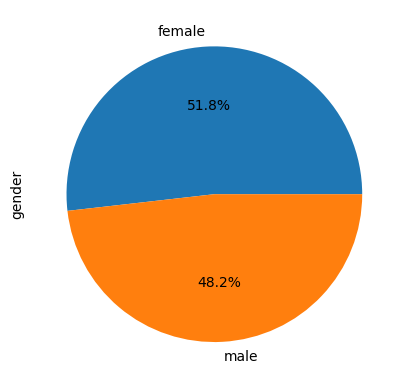

In [ ]:
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')


In [ ]:
df['score'] = (df['math_score'] + df['writing_score']+ df['reading_score']) / 3

Создаим столбец со средним значением во всем тестам

In [ ]:
(df.groupby(['parental_level_of_education','gender'])
['score']
 .agg(['mean','median']))

mean     median
parental_level_of_education gender                      
associate's degree          female  71.123563  71.333333
                            male    67.867925  68.833333
bachelor's degree           female  74.671958  73.666667
                            male    68.775758  68.000000
high school                 female  64.748227  66.000000
                            male    61.575163  62.500000
master's degree             female  73.648148  71.166667
                            male    73.521739  77.000000
some college                female  71.002825  72.000000
                            male    65.716049  65.166667
some high school            female  65.564103  68.666667
                            male    64.636364  65.500000

Выборка жензин и мужчин равная, видно что девушке имеют средний бал выше чем мужчины

In [ ]:
(df.groupby(['parental_level_of_education'])
['score']
 .agg(['count','mean','median']))

,count,mean,median
parental_level_of_education,,,
associate's degree,222,69.569069,69.666667
bachelor's degree,118,71.923729,71.166667
high school,196,63.096939,65.000000
master's degree,59,73.598870,73.333333
some college,226,68.476401,68.666667
some high school,179,65.108007,66.666667


<Axes: xlabel='parental_level_of_education'>

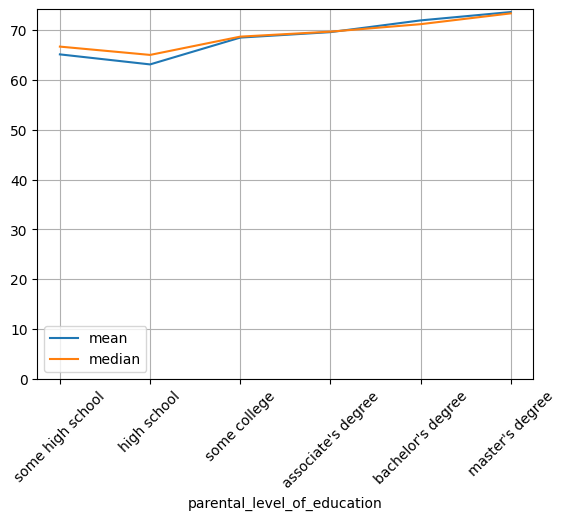

In [ ]:
order = ['some high school','high school','some college', 'associate\'s degree', 'bachelor\'s degree',  'master\'s degree']
df.groupby('parental_level_of_education')['score'].agg(['mean','median']).reindex(order).plot(rot=45,ylim=0,grid=True)

Как и ожидалось чем лучше образование - тем выше балы


In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
(df.groupby(['lunch'])
['score']
 .agg(['count','mean']))

,count,mean
lunch,,
free/reduced,355,62.199061
standard,645,70.837209


Выборка по эттим данным неравномерна, возможны выбросы


In [ ]:
(df.groupby(['race_ethnicity'])
['score']
 .agg(['count','mean']))

,count,mean
race_ethnicity,,
group A,89,62.992509
group B,190,65.468421
group C,319,67.131661
group D,262,69.179389
group E,140,72.752381


<Axes: xlabel='race_ethnicity'>

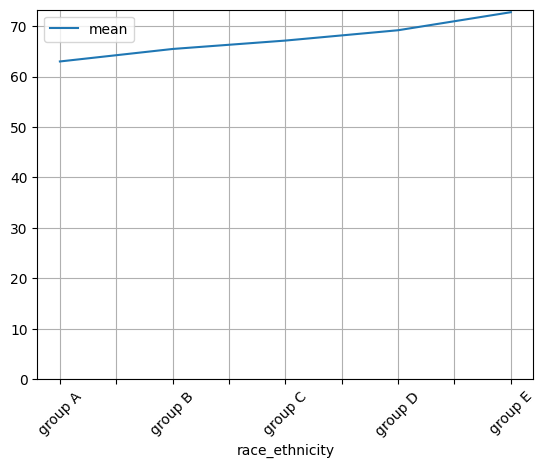

In [ ]:
(df.groupby(['race_ethnicity'])
['score']
 .agg(['mean'])).plot(rot=45,ylim=0,grid=True)

In [ ]:
df[['race_ethnicity','score']].corr()

<ipython-input-26-647d7ac47b55>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['race_ethnicity','score']].corr()


,score
score,1.0


Видим 100% кореляцию по race_ethnicity, возможно класификация учащихся по ходу обучения по их оценкам

In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
